In [ ]:
#Load data

In [31]:
import os

from src.data_handler import load_sql_file_to_dataframe

df = load_sql_file_to_dataframe(os.path.join("data","tickets.db"))

print(df.head())

SQL query executed successfully and data loaded into DataFrame.
      Ski Day valid_tickets
0  2016-12-07           112
1  2016-12-08          1769
2  2016-12-09          4230
3  2016-12-10          5952
4  2016-12-11          5451


In [32]:
# import libs
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [33]:
df

,Ski Day,valid_tickets
0,2016-12-07,112
1,2016-12-08,1769
2,2016-12-09,4230
3,2016-12-10,5952
4,2016-12-11,5451
...,...,...
678,2022-02-01,4
679,2022-02-02,4
680,2022-02-03,4
681,2022-02-04,4


# EDA

In [5]:
#Ich schaue mir die Daten zuerst  etwas genauer an

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Ski Day        683 non-null    object
 1   valid_tickets  683 non-null    object
dtypes: object(2)
memory usage: 10.8+ KB


In [35]:
df.describe()

,Ski Day,valid_tickets
count,683,683
unique,683,565
top,2022-02-05,2
freq,1,17


In [36]:
#Formate anpassen
df['valid_tickets'] = df['valid_tickets'].astype(int)

In [37]:
#missing values check

df.isna().sum()

Ski Day          0
valid_tickets    0
dtype: int64

In [38]:
#Datum
df['Ski Day'] = pd.to_datetime(df['Ski Day'])
df['year'] = df['Ski Day'].dt.year
df['month'] = df['Ski Day'].dt.month
df['month_year'] = df['month'].astype(str) + '_' + df['year'].astype(str)

In [39]:
df['year'].unique()

array([2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int32)

In [40]:
df['month'].unique()

array([12,  1,  2,  3,  4], dtype=int32)

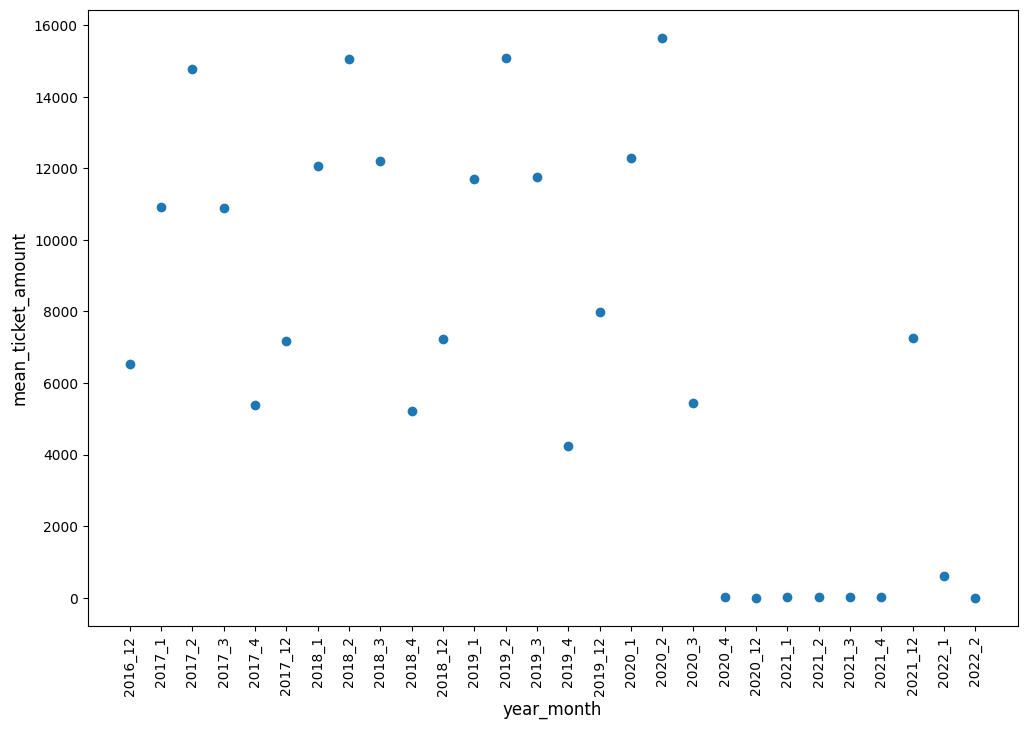

In [41]:
# Die Abhängigkeit von durchschnittlichen Anz verkaufter Tickets vom Verkaufsjahr und -monat aufbauen.
aggr_1 = df.groupby(['year','month'])[['valid_tickets']].mean().reset_index()
aggr_1['year_month'] = aggr_1['year'].astype(str) +'_'+ aggr_1['month'].astype(str)

plt.figure(figsize=(12,8))
plt.scatter(x='year_month', y='valid_tickets', data=aggr_1)
plt.ylabel('mean_ticket_amount', fontsize=12)
plt.xlabel('year_month', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [14]:
aggr_1[aggr_1['month']==1]

,year,month,valid_tickets,year_month
1,2017,1,10916.838710,2017_1
6,2018,1,12051.354839,2018_1
11,2019,1,11711.741935,2019_1
16,2020,1,12284.258065,2020_1
21,2021,1,14.480000,2021_1
26,2022,1,593.370370,2022_1


12


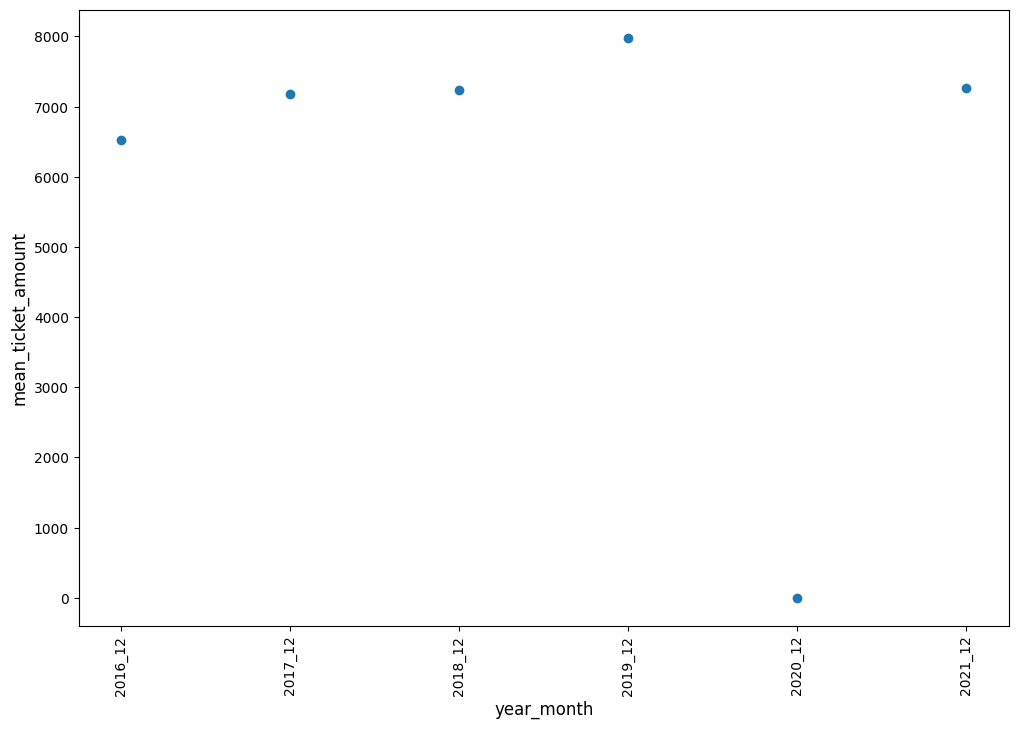

1


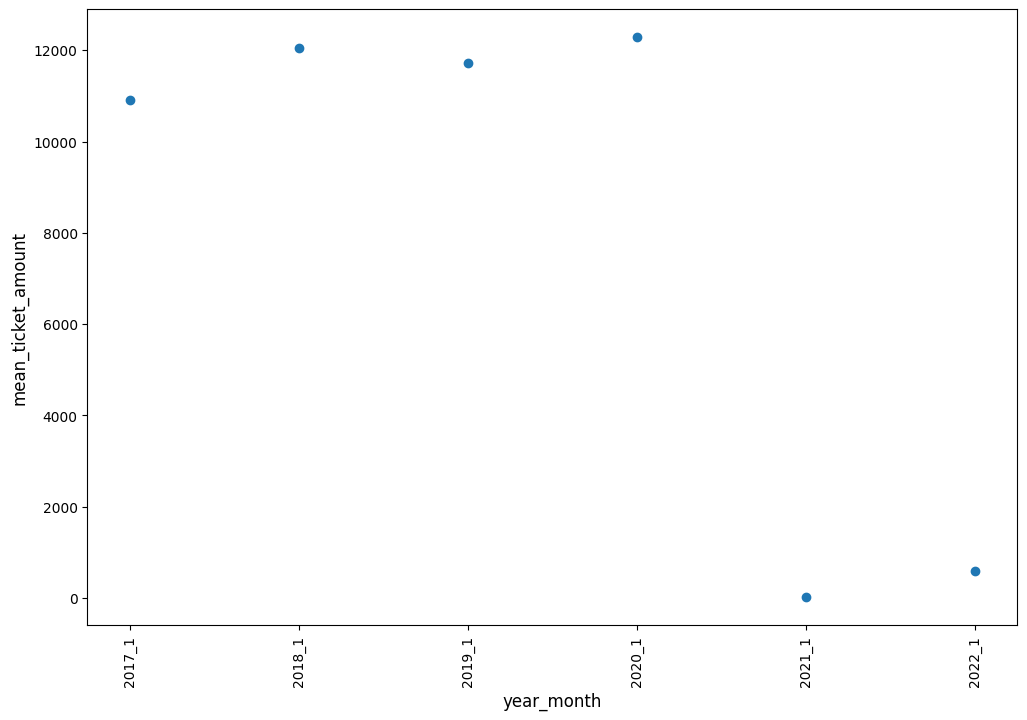

2


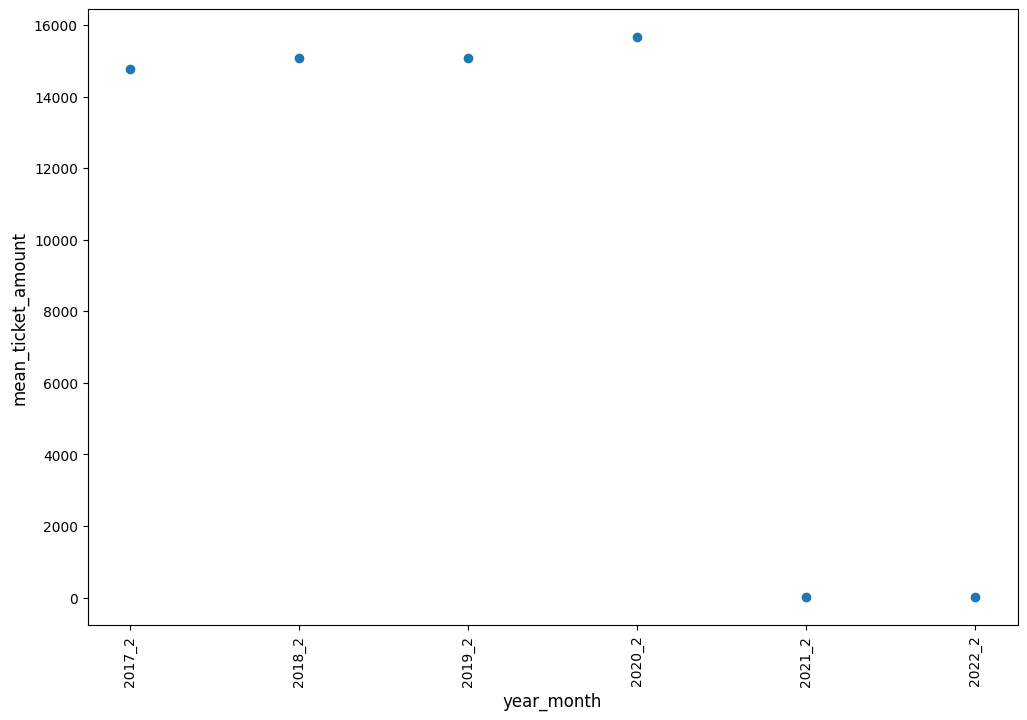

3


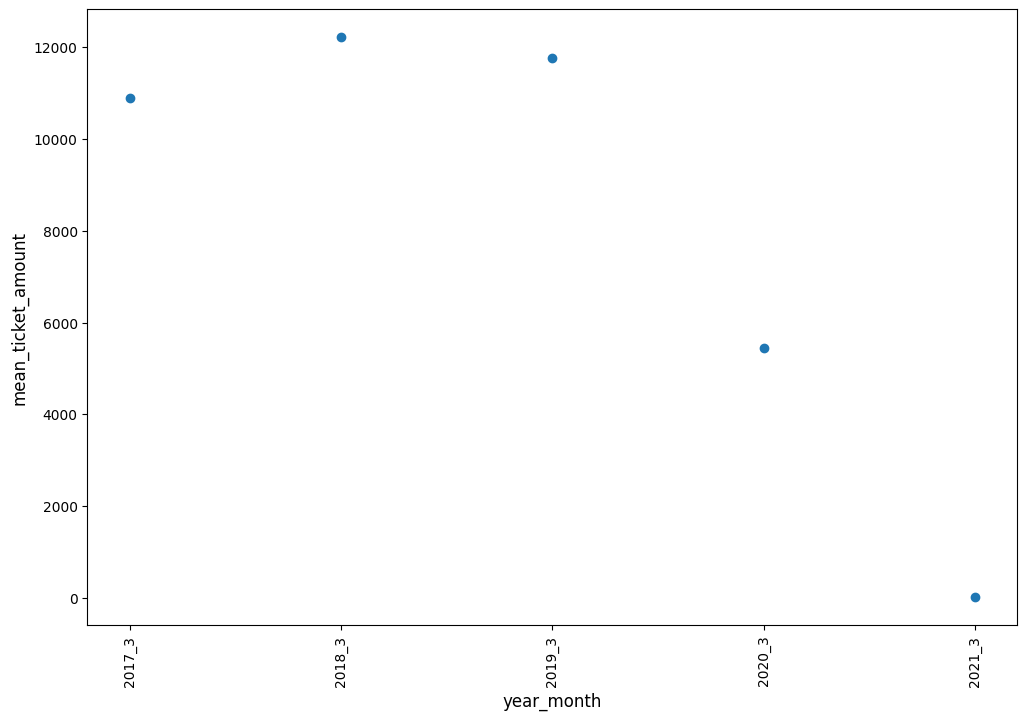

4


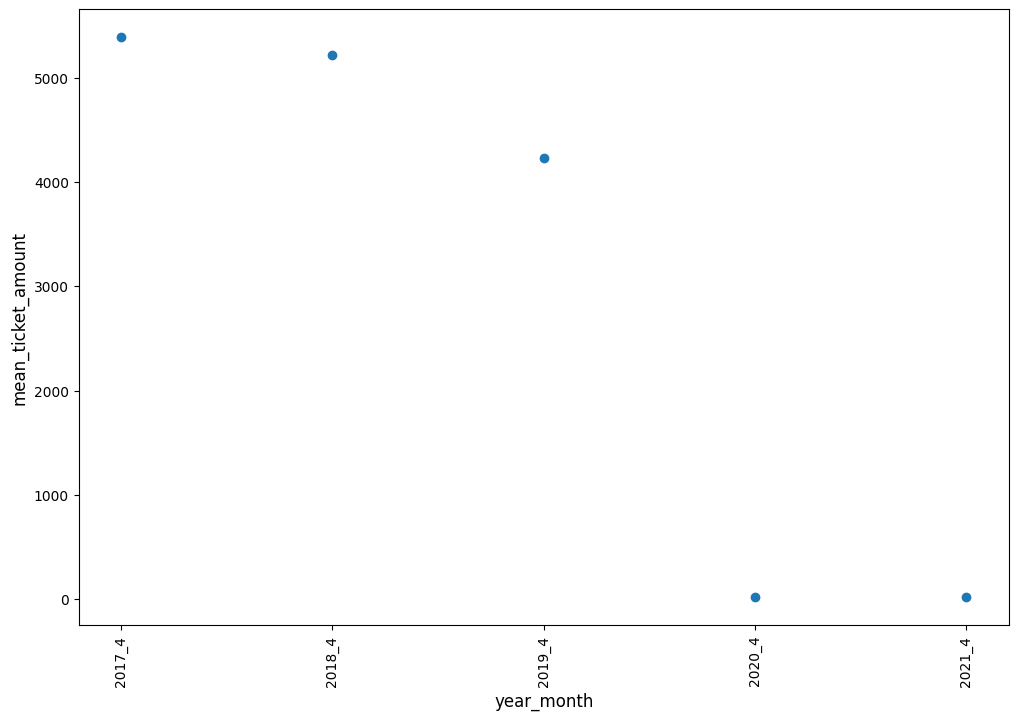

In [15]:
#Visualisierung nach Monaten
for i in df['month'].unique():
    print(i)
    plt.figure(figsize=(12,8))
    plt.scatter(x='year_month', y='valid_tickets', data=aggr_1[aggr_1['month']==i])
    plt.ylabel('mean_ticket_amount', fontsize=12)
    plt.xlabel('year_month', fontsize=12)
    plt.xticks(rotation='vertical')
    plt.show()

In [16]:
#Erkenntnisse:
#Corona
#Keine normale Besucherströme
#Modell sollte unterschiedliche Szenarien berücksichten
# für "normale" Situation ohne Beschränkungen sollte das Modell auf den Daten vom 12_2016 bis 2_2020 aufgebaut werden

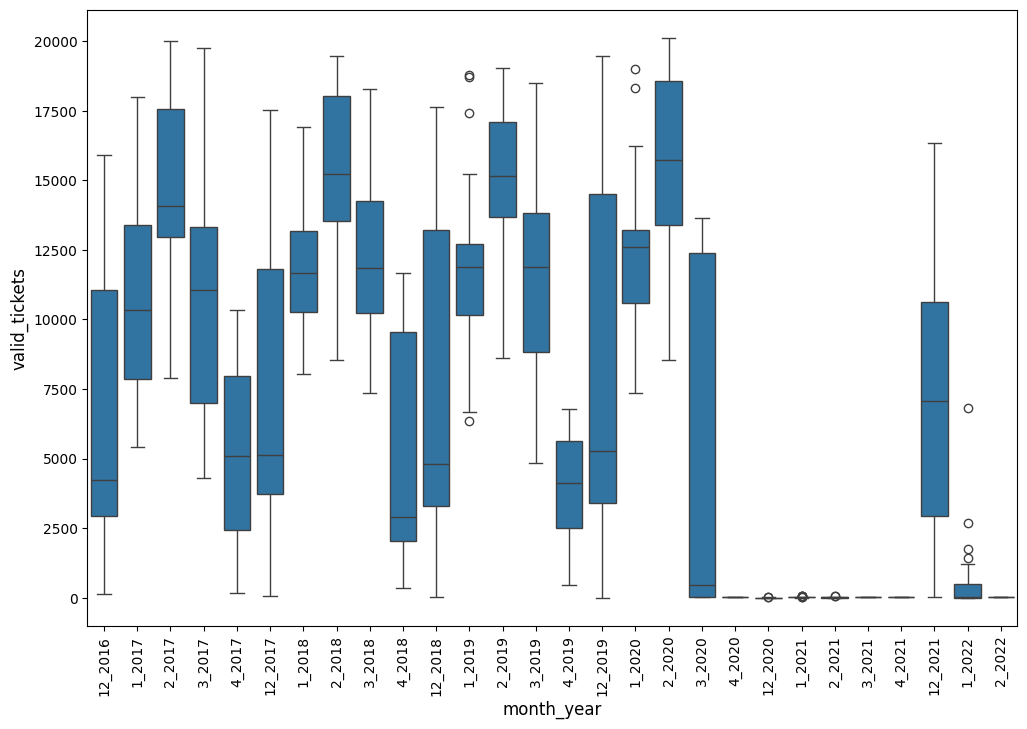

In [42]:
#Analysiere Verteilungen und Trends nach Monaten
plt.figure(figsize=(12,8))
sns.boxplot(x='month_year', y='valid_tickets', data=df)
plt.ylabel('valid_tickets', fontsize=12)
plt.xlabel('month_year', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [18]:
#zwei Szenarien abhängig von der Corona-Lage (normal und mit Restriktionen) müssen in Betracht gezogen werden
#für diese Aufgabe wird von "normalen" Entwicklung ausgegangen 

In [43]:
#Feature Engineering

df["Day"] = df["Ski Day"].dt.day                    # Tag im Monat
df["Weekday"] = df["Ski Day"].dt.weekday            # Wochentag (0=Montag, 6=Sonntag)
df["Week_Number"] = df["Ski Day"].dt.isocalendar().week  # Kalenderwoche (ISO)
df["Quarter"] = df["Ski Day"].dt.quarter            # Quartal (1-4)
df["Day_of_Year"] = df["Ski Day"].dt.dayofyear      # Tag im Jahr (1-365/366)
df["Is_Weekend"] = df["Ski Day"].isin([5, 6])    # Wochenende (Ja/Nein)

In [44]:
# Hier könnte man noch genauer auf das Datum der Schließung filtern, das Datum ist jedoch unbekannt. Der komplette März 2020 wird nicht in die Trainingsdaten einfließen.
df_before = df[df['Ski Day']<'2020-03-01']
df_after = df[df['Ski Day']>='2020-03-01']
df_after

,Ski Day,valid_tickets,year,month,month_year,Day,Weekday,Week_Number,Quarter,Day_of_Year,Is_Weekend
501,2020-03-01,12306,2020,3,3_2020,1,6,9,1,61,False
502,2020-03-02,13101,2020,3,3_2020,2,0,10,1,62,False
503,2020-03-03,12475,2020,3,3_2020,3,1,10,1,63,False
504,2020-03-04,13665,2020,3,3_2020,4,2,10,1,64,False
505,2020-03-05,12914,2020,3,3_2020,5,3,10,1,65,False
...,...,...,...,...,...,...,...,...,...,...,...
678,2022-02-01,4,2022,2,2_2022,1,1,5,1,32,False
679,2022-02-02,4,2022,2,2_2022,2,2,5,1,33,False
680,2022-02-03,4,2022,2,2_2022,3,3,5,1,34,False
681,2022-02-04,4,2022,2,2_2022,4,4,5,1,35,False


In [45]:

#erstelle Testdaten


# Datumsbereich erstellen
date_range = pd.date_range(start="2022-12-10", end="2023-04-15", freq="D")

# DataFrame erstellen
df_test = pd.DataFrame({"date": date_range})


#Feature Engineering

df_test['year'] = df_test['date'].dt.year
df_test['month'] = df_test['date'].dt.month

df_test["Day"] = df_test["date"].dt.day                    # Tag im Monat
df_test["Weekday"] = df_test["date"].dt.weekday            # Wochentag (0=Montag, 6=Sonntag)
df_test["Week_Number"] = df_test["date"].dt.isocalendar().week  # Kalenderwoche (ISO)
df_test["Quarter"] = df_test["date"].dt.quarter            # Quartal (1-4)
df_test["Day_of_Year"] = df_test["date"].dt.dayofyear      # Tag im Jahr (1-365/366)
df_test["Is_Weekend"] = df_test["date"].isin([5, 6])    # Wochenende (Ja/Nein)


# DataFrame anzeigen
print(df_test.head())  # Erste 5 Zeilen
print(df_test.tail())  # Letzte 5 Zeilen


        date  year  month  Day  Weekday  Week_Number  Quarter  Day_of_Year  \
0 2022-12-10  2022     12   10        5           49        4          344   
1 2022-12-11  2022     12   11        6           49        4          345   
2 2022-12-12  2022     12   12        0           50        4          346   
3 2022-12-13  2022     12   13        1           50        4          347   
4 2022-12-14  2022     12   14        2           50        4          348   

   Is_Weekend  
0       False  
1       False  
2       False  
3       False  
4       False  
          date  year  month  Day  Weekday  Week_Number  Quarter  Day_of_Year  \
122 2023-04-11  2023      4   11        1           15        2          101   
123 2023-04-12  2023      4   12        2           15        2          102   
124 2023-04-13  2023      4   13        3           15        2          103   
125 2023-04-14  2023      4   14        4           15        2          104   
126 2023-04-15  2023      4   15   

In [46]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         127 non-null    datetime64[ns]
 1   year         127 non-null    int32         
 2   month        127 non-null    int32         
 3   Day          127 non-null    int32         
 4   Weekday      127 non-null    int32         
 5   Week_Number  127 non-null    UInt32        
 6   Quarter      127 non-null    int32         
 7   Day_of_Year  127 non-null    int32         
 8   Is_Weekend   127 non-null    bool          
dtypes: UInt32(1), bool(1), datetime64[ns](1), int32(6)
memory usage: 4.8 KB


In [47]:
X_train_sz1 = df_before.drop(['valid_tickets', 'Ski Day', 'month_year'], axis=1)
y_train_sz1 = df_before['valid_tickets']



X_test_sz1 = df_test.drop(['date'], axis=1)

In [48]:
X_train_sz1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, 0 to 500
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         501 non-null    int32 
 1   month        501 non-null    int32 
 2   Day          501 non-null    int32 
 3   Weekday      501 non-null    int32 
 4   Week_Number  501 non-null    UInt32
 5   Quarter      501 non-null    int32 
 6   Day_of_Year  501 non-null    int32 
 7   Is_Weekend   501 non-null    bool  
dtypes: UInt32(1), bool(1), int32(6)
memory usage: 18.6 KB


In [49]:
###  cross-validate

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit

splitter = TimeSeriesSplit(n_splits=4)

model = LinearRegression()

cv_result = cross_validate(model, X_train_sz1, y_train_sz1, 
                           scoring='neg_mean_squared_error',
                           cv=splitter, return_train_score=True)

cv_result

{'fit_time': array([0.00201535, 0.00103569, 0.00104046, 0.        ]),
 'score_time': array([0.00099444, 0.        , 0.00101924, 0.        ]),
 'test_score': array([-27369903.20026939, -18244721.16574345, -13999706.88402219,
        -15432814.63489615]),
 'train_score': array([-11511494.02968821, -14013236.31140845, -14921370.13874953,
        -13648915.92974626])}

In [50]:
import numpy as np
print(f"Durchschnittliches MSE auf den Trainings-Folds: {-np.mean(cv_result['train_score']).round(3)}")
print(f"Durchschnittliches MSE auf den Test-Folds: {-np.mean(cv_result['test_score']).round(3)}")

Durchschnittliches MSE auf den Trainings-Folds: 13523754.102
Durchschnittliches MSE auf den Test-Folds: 18761786.471


In [51]:
# Modell auf dem gesamten Trainingsset trainieren
model.fit(X_train_sz1, y_train_sz1)

# Vorhersagen für Testdaten machen
y_pred = model.predict(X_test_sz1)



In [52]:
X_test_sz1['valid_tickets']= y_pred.round(0)

In [ ]:
# result export
df_test['predictions']= y_pred.round(0)
df_test[['date', 'predictions']].to_csv('predictions.csv')

In [28]:
#Ergebnisvalidierung

In [53]:
df_valid = pd.concat([X_train_sz1, y_train_sz1], axis=1)

In [54]:
df_final = pd.concat([df_valid, X_test_sz1], axis=0)
df_final['month_year'] = df_final['month'].astype(str) + '_' + df_final['year'].astype(str)
df_final

,year,month,Day,Weekday,Week_Number,Quarter,Day_of_Year,Is_Weekend,valid_tickets,month_year
0,2016,12,7,2,49,4,342,False,112.0,12_2016
1,2016,12,8,3,49,4,343,False,1769.0,12_2016
2,2016,12,9,4,49,4,344,False,4230.0,12_2016
3,2016,12,10,5,49,4,345,False,5952.0,12_2016
4,2016,12,11,6,49,4,346,False,5451.0,12_2016
...,...,...,...,...,...,...,...,...,...,...
122,2023,4,11,1,15,2,101,False,8113.0,4_2023
123,2023,4,12,2,15,2,102,False,7943.0,4_2023
124,2023,4,13,3,15,2,103,False,7774.0,4_2023
125,2023,4,14,4,15,2,104,False,7605.0,4_2023


12


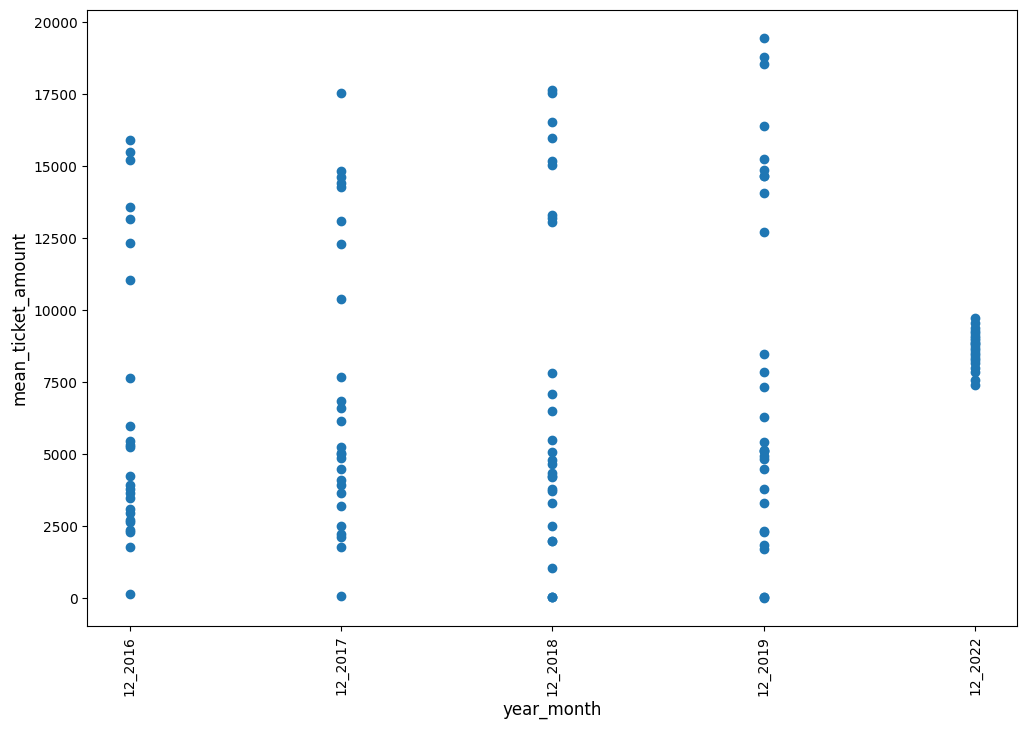

1


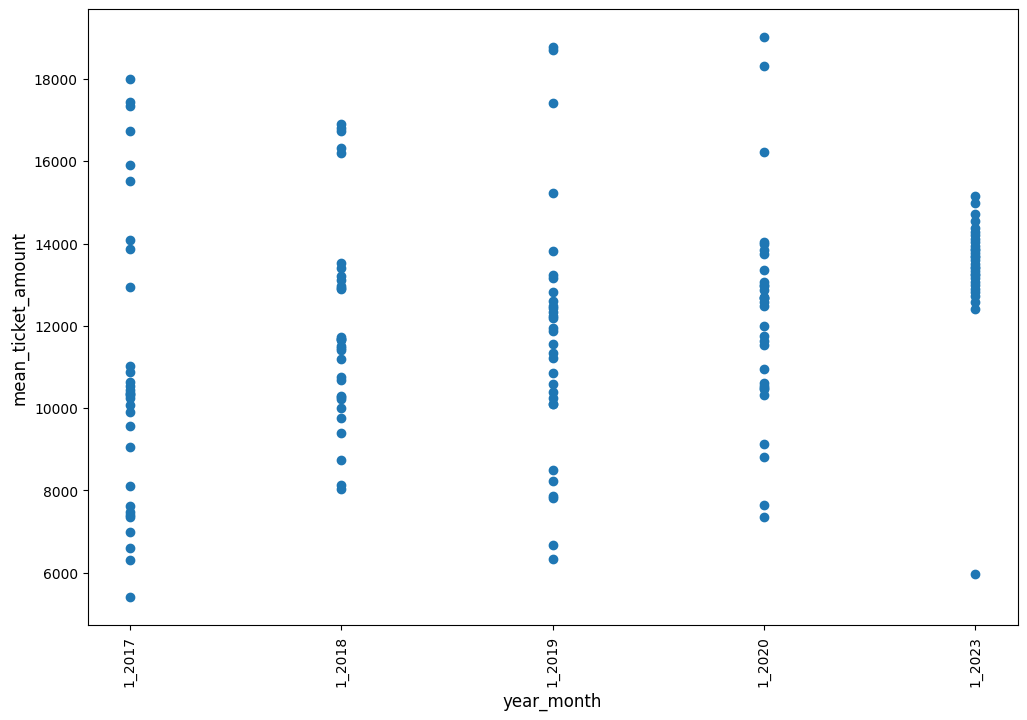

2


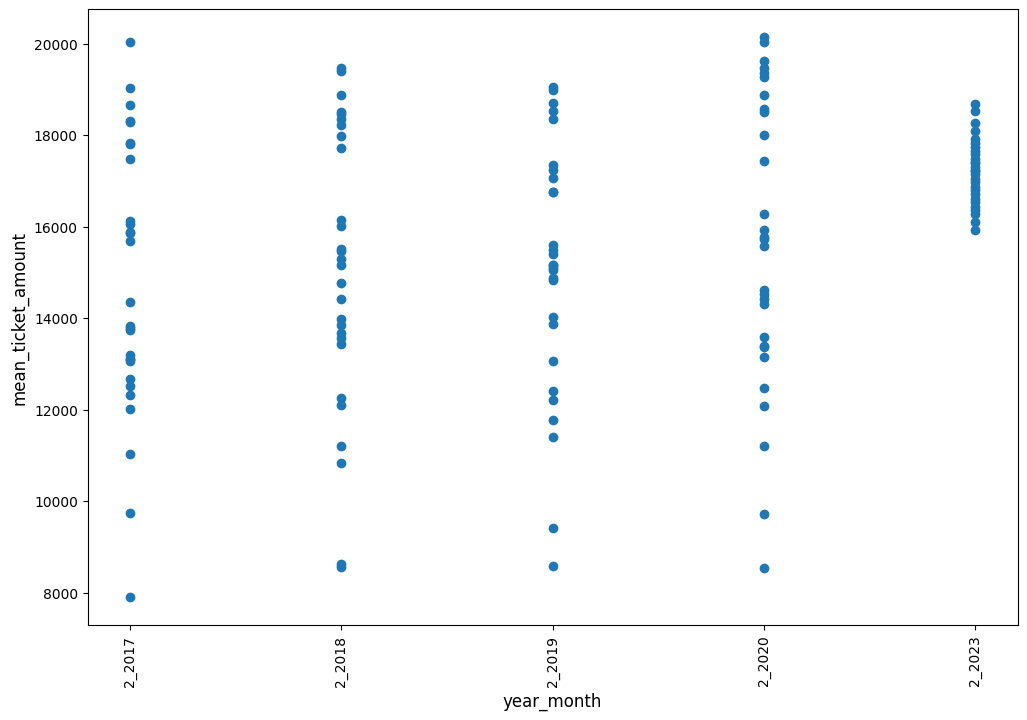

3


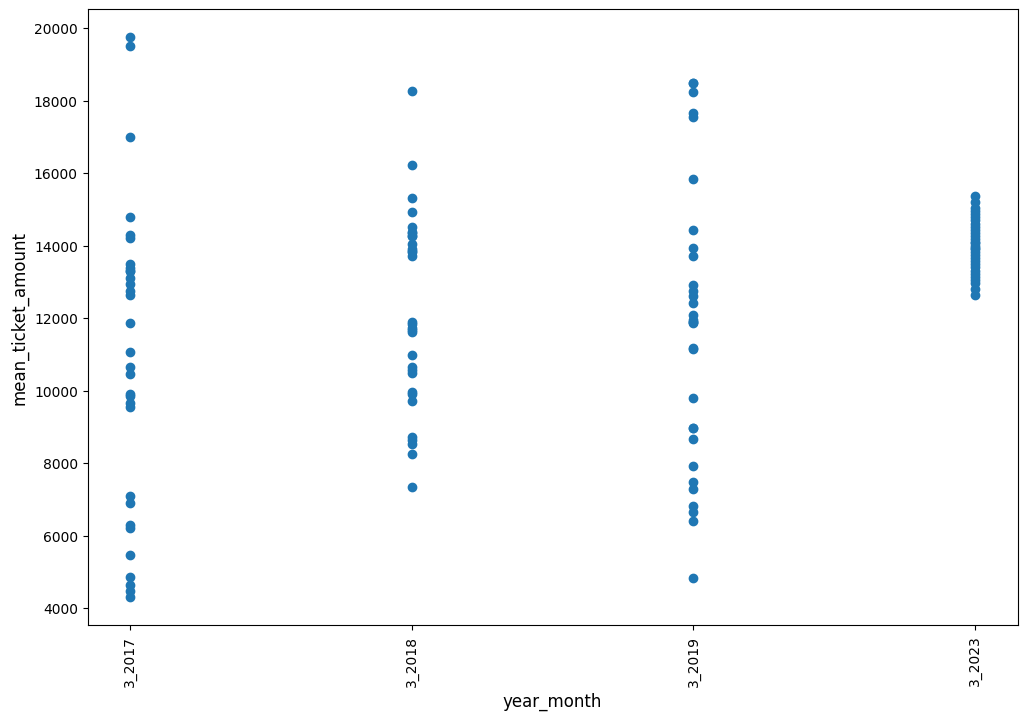

4


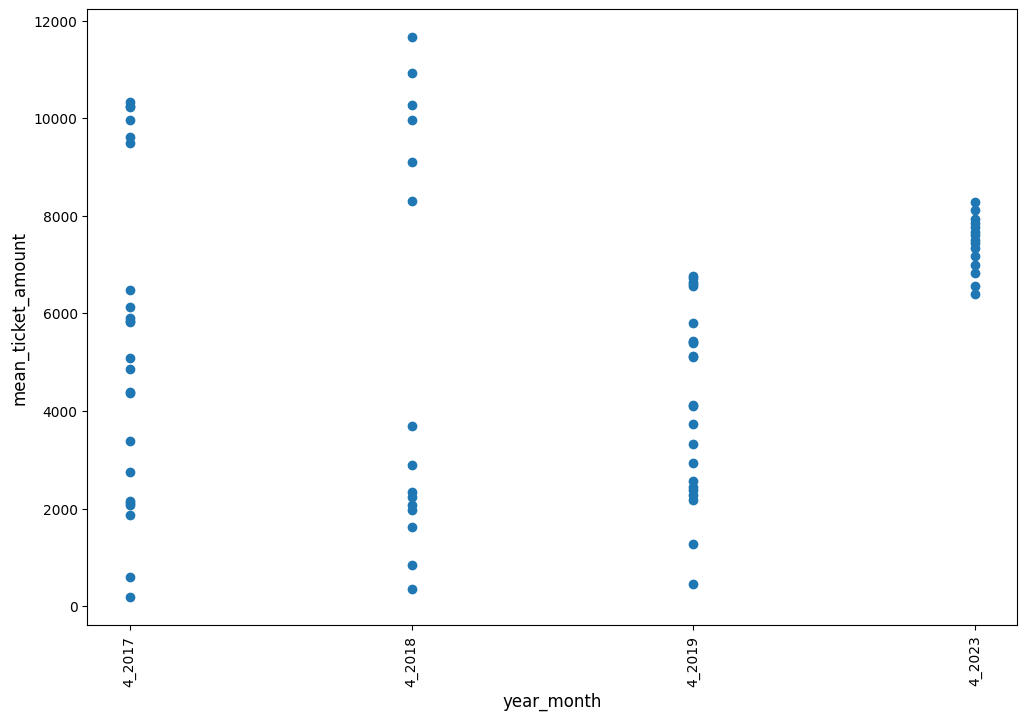

In [55]:
#Visualisierung nach Monaten
for i in df_final['month'].unique():
    print(i)
    plt.figure(figsize=(12,8))
    plt.scatter(x='month_year', y='valid_tickets', data=df_final[df_final['month']==i])
    plt.ylabel('mean_ticket_amount', fontsize=12)
    plt.xlabel('year_month', fontsize=12)
    plt.xticks(rotation='vertical')
    plt.show()

In [56]:
df_valid

,year,month,Day,Weekday,Week_Number,Quarter,Day_of_Year,Is_Weekend,valid_tickets
0,2016,12,7,2,49,4,342,False,112
1,2016,12,8,3,49,4,343,False,1769
2,2016,12,9,4,49,4,344,False,4230
3,2016,12,10,5,49,4,345,False,5952
4,2016,12,11,6,49,4,346,False,5451
...,...,...,...,...,...,...,...,...,...
496,2020,2,25,1,9,1,56,False,20134
497,2020,2,26,2,9,1,57,False,19624
498,2020,2,27,3,9,1,58,False,19351
499,2020,2,28,4,9,1,59,False,17431


In [57]:
mse = np.mean((df_valid.valid_tickets - X_test_sz1.valid_tickets) ** 2)
mse

np.float64(21283115.716535434)